In [54]:
# Importing more generic libraries
import glob
import os
import math
import csv
import ast
from collections import Counter

# Importing data structure libraries
import pandas as pd
import numpy as np

# Import graphing tools
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure that any graphs produced appears in the notebook
%matplotlib inline

# Import text analysist tools
import re
import nltk
#from nltk.tokenize import RegexpTokenizer
import jieba

In [36]:
import csv

# open raw data and seperate data in to days
with open('tweets_gene.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    
    for row in readCSV:
     
        if row[3]=='2018-11-25':
            with open('1125.csv','a') as f:
                wr = csv.writer(f,dialect = 'excel')
                wr.writerow(row)
        if row[3]=='2018-11-26':
            with open('1126.csv','a') as f:
                wr = csv.writer(f,dialect = 'excel')
                wr.writerow(row)
        if row[3]=='2018-11-27':
            with open('1127.csv','a') as f:
                wr = csv.writer(f,dialect = 'excel')
                wr.writerow(row)
        if row[3]=='2018-11-28':
            with open('1128.csv','a') as f:
                wr = csv.writer(f,dialect = 'excel')
                wr.writerow(row)
        if row[3]=='2018-11-29':
            with open('1129.csv','a') as f:
                wr = csv.writer(f,dialect = 'excel')
                wr.writerow(row)
        if row[3]=='2018-11-30':
            with open('1130.csv','a') as f:
                wr = csv.writer(f,dialect = 'excel')
                wr.writerow(row)
      

In [37]:
# Loading multiple files in a path
# This is used when all the files that you want to load are all together in a folder
# Parameters:
# path           = Path to the folder
# colSelect      = Which columns in the CSV files would you like to load
# colNames       = The names of the columns that you have selected before
# need_convert   = Check to see if we need to convert list object
# column_convert = Which columns do you need to convert
def loading_multiple_file_path(path, colSelect, colNames, need_convert=None, column_convert=None):
    
    # Load all the files
    allFiles = glob.glob(path + "/*.csv")

    # Holds all the tweets
    dataframe = pd.DataFrame()

    # Holds the individual date tweets
    dataframe= []

    # Debugs to ensure the code is working
    print("Begin reading .csv in " + path + "....\n")
    
    # Check to see if some columns need to be converted back into a list object 
    if need_convert:
        
        # Create the function to convert to a list
        string_to_list = lambda x: ast.literal_eval(str(x))

        # Create the converter that will convert all the columns we tell it to back to a list object
        conv = {}
        for entry in column_convert:
            conv[entry] = string_to_list
        
        # Read every file
        for file_ in allFiles:

            # Debugs to ensure the code is working
            print("Reading and Converting file: " + str(file_) + "....")
            df = pd.read_csv(file_,  skiprows=1, usecols=colSelect, names=colNames)

            dataframe.append(df)
    else:
        # Read every file
        for file_ in allFiles:

            # Debugs to ensure the code is working
            print("Reading file: " + str(file_) + "....")
            df = read_frame
            df = pd.read_csv(file_,  skiprows=1, usecols=colSelect, names=colNames)

            dataframe.append(df)
    
    # Debugs to ensure the code is running
    print("\nFinished reading all files in " + path + "\n")
    
    print("Merge all individual file dataframes together into a single dataframe...\n")
    dataframe = pd.concat(dataframe)
    
    print("Finished merging all the files into a single dataframe.\n" )
    
    return dataframe

# Save the dataframe into a file
# Parameters:
# data_frame_name = Name of the dataframe to save
# name_of_file    = The name of the file you want to save it as
def save_frame(data_frame_name, name_of_file):
    
    print("Begin saving dataframe into a csv.\n")
    
    name = name_of_file + ".csv"
    # Save the dataframe
    data_frame_name.to_csv(name, sep=',', encoding='utf-8')
    
    print("Finish and saved into " + name + "\n")

# Loads the dataframe from a single file. By default it skips the 1st column (this is usually the index) 
# Parameters:
# csv_file_name   = Name of the file to load
# length          = The amount of columns to load (take the amount of columns + 1)
# custom          = If you want to load in a selective column amount turn true
# colList         = Which columns you want to load
# colNames        = The names of the columns that you want to load
def read_frame(csv_file_name, length=None, custom= False, colList = None, colNames = None):
    print("Reading csv " + csv_file_name)
    name = csv_file_name + ".csv"
    
    # Load csv by specifying which ones you want 
    if custom:
        return_frame = pd.read_csv(name,  usecols = colList)
    # Load csv by length skipping the first one (index)
    else: 
        return_frame = pd.read_csv(name,  usecols = range(1,length))
    print("Finish reading " + csv_file_name + "\n")
    return return_frame

# Similar to the one before except this converts the list present in the csv back into list objects to be used
# Parameters:
# csv_file_name   = Name of the file to load
# columnNames     = The names of the columns that you want to load
# length          = The amount of columns to load (take the amount of columns + 1)
# custom          = If you want to load in a selective column amount turn true
# colList         = Which columns you want to load
def read_frame_convert_list (csv_file_name, columnNames, length=None, custom= False, colList = None):
    
    # Create the function to convert to a list
    string_to_list = lambda x: ast.literal_eval(str(x))

    # Create the converter that will convert all the columns we tell it to back to a list object
    conv = {}
    
    # Assign the converter for each column to convert
    for entry in columnNames:
        conv[entry] = string_to_list
    
    print("Reading csv " + csv_file_name)
    name = csv_file_name + ".csv"

    # Load a specified amount of columns from the csv
    if custom:
        return_frame = pd.read_csv(name,  usecols = colList,  converters=conv)
    
    # Load the csv based on length
    else: 
        return_frame = pd.read_csv(name,  usecols = range(1,length),  converters=conv)
    print("Finish reading " + csv_file_name + "\n")
    
    return return_frame

In [38]:
# Extract the links from a text
def extract_links(dataframe):
    
    # Regrex to extract all the links
    urls = re.findall(r"http\S+", dataframe['text'])
    
    # Replace the link with the placeholder @LINK
    dataframe['text'] = re.sub(r"http\S+", "@LINK", dataframe['text'])
    
    # Insert the URL into their own column
    if not urls:
        dataframe["URL"] = []
    else: 
        dataframe["URL"] = urls
    return dataframe
    
    
# Extract tweeter mentions in a text
def extract_mentions(dataframe):
    
    # Regrex to extract all the mentions
    mention = re.findall(r"@([A-Za-z0-9_]+)", dataframe['text'])
    
    # Replace the mention with the placeholder @MENTION
    dataframe['text'] = re.sub(r"@([A-Za-z0-9_]+)", "@MENTION", dataframe['text'])
    
    # Insert the mention into their own column
    if not mention:
        dataframe["MENTION"] = []
    else: 
        dataframe["MENTION"] = mention
    return dataframe

# Changes the date the declared format   
def format_date(dataframe, column_name, time_format):
    
    print("Start formatting date ")
    
    # Convert the time to date-time object
    dataframe[column_name] = pd.to_datetime(dataframe[column_name])
    
    # Convert the time to the desired format
    dataframe[column_name] = dataframe[column_name].apply(lambda x: x.strftime(time_format))  
    
    print("Finish formatting date \n") 
    
    return dataframe

In [47]:
# Start inital setup
MasterTweetFrame = loading_multiple_file_path("./tweets", [3,8,10], ["time_stamp","screen_name", "text"])

print("Start extracting Mentions\n")

# Extract the mentions
MasterTweetFrame = MasterTweetFrame.apply(extract_mentions, axis=1)

print("End extracting Mentions\n")
print("Start extracting URL\n")

# Extract the URLS
MasterTweetFrame = MasterTweetFrame.apply(extract_links, axis=1)

print("End Extracting URL\n")

# Format the date to use have year, month, day
MasterTweetFrame = format_date(MasterTweetFrame, "time_stamp", "%Y-%m-%d")

Begin reading .csv in ./tweets....

Reading file: ./tweets/1128.csv....
Reading file: ./tweets/1129.csv....
Reading file: ./tweets/1130.csv....
Reading file: ./tweets/1125.csv....
Reading file: ./tweets/1127.csv....
Reading file: ./tweets/1126.csv....

Finished reading all files in ./tweets

Merge all individual file dataframes together into a single dataframe...

Finished merging all the files into a single dataframe.

Start extracting Mentions

End extracting Mentions

Start extracting URL

End Extracting URL

Start formatting date 
Finish formatting date 



In [48]:
# first 5 entries of MasterTweetFrame
MasterTweetFrame[:5]

,time_stamp,screen_name,text,MENTION,URL
0,2018-11-28,荷兰一网 Hollandone,贺建奎现身香港，亲口承认“基因编辑婴儿”已出生 @LINK …,[],[https://hollandone.com/qwjh/%e8%b4%ba%e5%bb%b...
1,2018-11-28,A. G,中国人对于基因编辑的理解（包括技术上的和伦理上的），还停留在和“发明一个电动的切面条的小装置...,[],[https://twitter.com/mranti/status/10677635771...
2,2018-11-28,掩膜版,我塘的福利处女都是基因编辑过的，没姨妈。一点都不浪费！,[],[]
3,2018-11-28,yuqiu,1. 全世界的道德君子都在谴责他，估计他是很难再做了，对他自己来说最大的错误是不应该公开。道...,[],[]
4,2018-11-28,FROST,基因编辑，未来一定会让很多传统医疗系统的从业人员遭到冲击，甚至保险行业，殡葬行业等等，都会遭...,[],[]


In [49]:
# Plot a column value over time 
# Parameters:
# column        = Columns to be used for the data
# date          = The index with the dates
# dataframe     = The dataframe of the data
# intervalValue = Set intervals for date, larger the number the bigger the interval between date stamp on graph
# saveImage     = True to save image, false to skip
# fileName      = Name of the save file
def basic_plot_generator(column, date, dataframe, saveImage=False, fileName = None):
    # Plot how many tweets there are over the whole duration
    fig,ax = plt.subplots()

    # Set title for the graph
    fig.suptitle("Gene Editing " + column + " Over Time", fontsize="x-large")

    # Create subplot of Tweet Count over time using a the default 1 month interval
    ax.plot(pd.to_datetime(date), dataframe[column], label=column)

    
    # Set the date format
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    fig.autofmt_xdate()
    
    # Calculate the average
    countMean = [dataframe[column].mean()]*len(pd.to_datetime(date))
    mean_line = ax.plot(pd.to_datetime(date),countMean, label='Average Overall Count', linestyle='--')

    # Create a legend for the subplot
    legend = ax.legend(loc='upper center', shadow=True)
    
    # Saving the Plot as an Image
    if saveImage:
        fig.savefig(fileName)
    
    # Show Plot
    plt.show()

# Plot different columns against eachother over time
# Parameters:
# column        = Columns to be used for the data
# date          = The index with the dates
# dataframe     = The dataframe of the data
# intervalValue = Set intervals for date, larger the number the bigger the interval between date stamp on graph
# saveImage     = True to save image, false to skip
# fileName      = Name of the save file
def plot_compare_generator(column, date, dataframe, saveImage=False, fileName = None):
    
    # Plot how many tweets there are over the whole duration
    fig,ax = plt.subplots()

    # Generate Title
    title = "Title"

    # Add all columns to the title
    for element in column:
        title = title + " " + element 
    
    title = title + " Over time"
    
    # Set title for the graph
    fig.suptitle(title, fontsize="x-large")
    
    for element in column:
        # Create subplot of Tweet Count over time using a 3 month interval
        ax.plot(pd.to_datetime(date), dataframe[element], label=element)
        
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    fig.autofmt_xdate()
    
    # Create a legend for the subplot
    legend = ax.legend(loc='upper center', shadow=True)
    
    # Saving the Plot as an Image
    if saveImage:
        fig.savefig(fileName)
    
    # Show Plot
    plt.show()

In [64]:
# Calculate sentence length
def tokenize_text(dataframe):
    # Calculate number of sentences
    sentence = nltk.sent_tokenize(dataframe["text"]) 
    dataframe['sentence'] = sentence
    dataframe['num_sentence'] = len(sentence)
    
    # Calculate length of sentences
    sentence_length = []
    tokens = []
    for line in sentence:
        
        # Set tokenizer to reconize words + the shorthand @MENTION and @LINK
        #tokenizer = RegexpTokenizer(r'\w+|@[A-Za-z0-9_-]*')
        words = (" ".join(jieba.cut(line,cut_all=False))).split() # Chinese tokenizer
   
        # Add the amount of tokens to the list 
        tokens = tokens + words
        sentence_length.append(len(words))

    # Calculate average sentence length
    dataframe['average_sentence_length'] = math.ceil(sum(sentence_length)/len(sentence_length))
        
    # Save Tokenized text
    dataframe['tokens'] = tokens
    
    # Save Token Count
    dataframe['count_tokens'] = len(tokens)
    
    return dataframe

In [65]:
# Section off the tweets into smaller chuncks and save it into csv
# Parameters:
# size            = The size of each segement of the data (if given the total size of the dataframe, it will be 1 file)
# Frame           = The dataframe to look at
# Filename        = The name of the csv (a numbering will be attached to the end of the name)
# algorithm       = The algorithm that is being chosen
# savedirectory   = The folder name to save the csv
def create_save_section(size, Frame, Filename, algorithm, savedirectory):
    
    # Create the file directory if it does not exist
    if not os.path.exists(savedirectory):
        os.makedirs(savedirectory)
    
    # Divide the dataframe into smaller chunk to work with
    # Set size of each chunk
    n = size

    #Create a list of the frame section
    FrameList = [Frame[i:i+n] for i in range(0,Frame.shape[0],n)]
    
    # Iterate through each section in the list
    for section in range(0,len(FrameList)):
        
        # Use the corresponding algorithm
        # if you want to add a new one this is where it is done
        if algorithm == 1:
            # Print debug and tokenize the text
            print("Looking at section: " + str(section+1))
            newFrame = FrameList[section].apply(tokenize_text, axis=1)
            print("Finish looking at section: " + str(section+1))
        
        if algorithm == 2:
            # Print debug and extract hashtag from dataframe
            print("Looking at section: " + str(section+1))
            newFrame = FrameList[section].apply(extract_hashtag, axis=1)
            print("Finish looking at section: " + str(section+1))
            
        if algorithm == 3:
            # Print debug and update the dictionary of categories
            print("Looking at section: " + str(section+1))
            newFrame = FrameList[section].apply(update_values_category, axis=1)
            print("Finish looking at section: " + str(section+1))
        
        # Create the name of the save location based on file and directory
        saveLocation = "./" + savedirectory + "/" + Filename 
        
        # Print debug and save the section into a csv
        print("Saving the section: " + str(section+1) + " into csv")
        newFrame.to_csv(saveLocation + "_" + str(section+1) + ".csv", sep=',', encoding='utf-8')
        print("Finish saving into " + saveLocation + "_" + str(section+1) + ".csv")
    
    print("Finised saving all the files into " + saveLocation)

In [66]:
# Copy the columns we want into new dataframe
TokenTweetFrame = MasterTweetFrame[['time_stamp','text']].copy()

# Tokenize and Save the Tweets (each section has 10000 entries) 
# 1 refers to algorithm 1 in the create_save_frame (to tokenize text)
# def create_save_section(size, Frame, Filename, algorithm, savedirectory)
create_save_section(10000, TokenTweetFrame, "TokenTweet", 1, "Tweets_Tokenize")

# Loading the csvs into a dataframe
# Since all the csv are located in "Tweets_Tokenize we can just load from there
# def loading_multiple_file_path(path, colSelect, colNames, need_convert=None, column_convert=None):
TokenTweetFrame = loading_multiple_file_path("./Tweets_Tokenize", [1,2,3,4,5,6,7], ["time_stamp","text","sentence","num_sentence","average_sentence_length","tokens","count_tokens"])

Looking at section: 1
Finish looking at section: 1
Saving the section: 1 into csv
Finish saving into ./Tweets_Tokenize/TokenTweet_1.csv
Finised saving all the files into ./Tweets_Tokenize/TokenTweet
Begin reading .csv in ./Tweets_Tokenize....

Reading file: ./Tweets_Tokenize/TokenTweet_1.csv....

Finished reading all files in ./Tweets_Tokenize

Merge all individual file dataframes together into a single dataframe...

Finished merging all the files into a single dataframe.



In [67]:
# Preview the first 5 entries of TokenTweet
TokenTweetFrame[:5]

,time_stamp,text,sentence,num_sentence,average_sentence_length,tokens,count_tokens
0,2018-11-28,贺建奎现身香港，亲口承认“基因编辑婴儿”已出生 @LINK …,['贺建奎现身香港，亲口承认“基因编辑婴儿”已出生 @LINK\xa0…'],1,16,"['贺建奎', '现身', '香港', '，', '亲口', '承认', '“', '基因'...",16
1,2018-11-28,中国人对于基因编辑的理解（包括技术上的和伦理上的），还停留在和“发明一个电动的切面条的小装置...,['中国人对于基因编辑的理解（包括技术上的和伦理上的），还停留在和“发明一个电动的切面条的小...,1,59,"['中国', '人', '对于', '基因', '编辑', '的', '理解', '（', ...",59
2,2018-11-28,我塘的福利处女都是基因编辑过的，没姨妈。一点都不浪费！,['我塘的福利处女都是基因编辑过的，没姨妈。一点都不浪费！'],1,19,"['我塘', '的', '福利', '处女', '都', '是', '基因', '编辑', ...",19
3,2018-11-28,1. 全世界的道德君子都在谴责他，估计他是很难再做了，对他自己来说最大的错误是不应该公开。道...,"['1.', '全世界的道德君子都在谴责他，估计他是很难再做了，对他自己来说最大的错误是不应...",2,40,"['1', '.', '全世界', '的', '道德', '君子', '都', '在', '...",79
4,2018-11-28,基因编辑，未来一定会让很多传统医疗系统的从业人员遭到冲击，甚至保险行业，殡葬行业等等，都会遭...,['基因编辑，未来一定会让很多传统医疗系统的从业人员遭到冲击，甚至保险行业，殡葬行业等等，都...,1,54,"['基因', '编辑', '，', '未来', '一定', '会', '让', '很多', ...",54


In [68]:
# Convert the column time_stamp back to an index
TokenTweetFrame = TokenTweetFrame.set_index("time_stamp")

# Resort the index (This is because we read from Mulitple Files)
TokenTweetFrame.sort_index(inplace=True)

# Calculate average on num_sentence, averaege_sentence_length and group by time_stamp
TokenGraphFrame = TokenTweetFrame[['num_sentence','average_sentence_length','count_tokens']].copy()

# Calculate average per day and save them into their own dataframe for graphing
TokenGraphFrame = TokenGraphFrame[['num_sentence','average_sentence_length','count_tokens']].groupby(["time_stamp"]).mean()

# See what the first 5 entry look likes of token graph
TokenGraphFrame[:5]

,num_sentence,average_sentence_length,count_tokens
time_stamp,,,
2018-11-25,1.030769,42.553846,43.400000
2018-11-26,1.015683,41.023063,41.332103
2018-11-27,1.018945,41.889039,42.211096
2018-11-28,1.028358,42.397015,42.997015
2018-11-29,1.006000,41.408000,41.504000


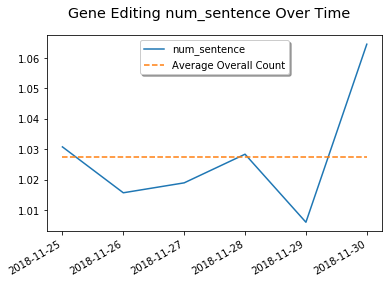

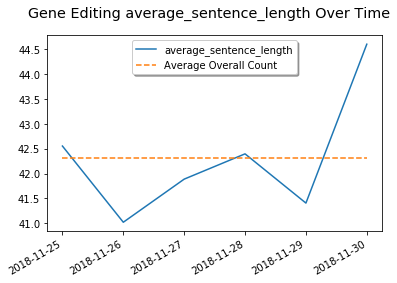

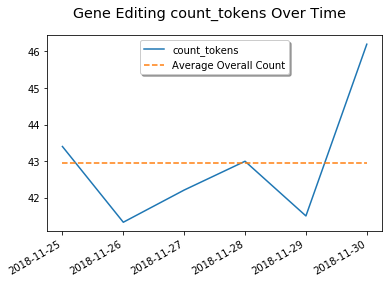

In [69]:
# Using the graph function we made we will plot these averages
for columns in TokenGraphFrame[["num_sentence", "average_sentence_length","count_tokens"]]:
    basic_plot_generator(columns, TokenGraphFrame.index, TokenGraphFrame)

In [70]:
# Find out how many unique exist in the dataset for each type
print("There are " + str(len(MasterTweetFrame.time_stamp)) + " tweets recorded in the dataset")
print("There are " + str(len(MasterTweetFrame.time_stamp.unique())) + " days recorded in the dataset")
print("There are " + str(len(MasterTweetFrame.screen_name.unique())) + " usernames in the dataset")

There are 3213 tweets recorded in the dataset
There are 6 days recorded in the dataset
There are 1598 usernames in the dataset


In [108]:
# Extract out the hashtags and count how many there are
def extract_hashtag(dataframe):
    
    # Finds all the hashtags with regrex and capitalize them with ".upper()"
    hashtag = re.findall(r"#(\w+)", dataframe["text"].upper())

    # Remove all instances GAMERGATE hashtag (since all tweets has it) This includes duplicates
    # If you would like to keep them comment out the while loop
    # If you would like to remove a different hashtag you can copy the following two lines and change the word
    # Remember all tokens are capitalized
    while "基因编辑" in hashtag:
        hashtag.remove("基因编辑")

    # Insert hashtag and count into dataframe
    if hashtag:
        dataframe['HASHTAG'] = hashtag
        dataframe['count_hashtag'] = len(hashtag)
    else:
        dataframe['HASHTAG'] = []
        dataframe['count_hashtag'] = 0
        
    return dataframe

In [72]:
# Create new dataframe with information we need from MasterTweetFrame
HashtagStatisticFrame = MasterTweetFrame[['time_stamp','text']].copy()

# Create sections using the extract hashtag
create_save_section(10000,HashtagStatisticFrame , "HashtagStatistic", 2, "Hashtag_Stat")

# Load back the csv (Note the files are saved in a folder)
HashtagStatisticFrame = loading_multiple_file_path("./Hashtag_Stat", [1,2,3,4], ["time_stamp","text","HASHTAG","count_hashtag"])

# Convert the column time_stamp to an index
HashtagStatisticFrame = HashtagStatisticFrame.set_index("time_stamp")

Looking at section: 1
Finish looking at section: 1
Saving the section: 1 into csv
Finish saving into ./Hashtag_Stat/HashtagStatistic_1.csv
Finised saving all the files into ./Hashtag_Stat/HashtagStatistic
Begin reading .csv in ./Hashtag_Stat....

Reading file: ./Hashtag_Stat/HashtagStatistic_1.csv....

Finished reading all files in ./Hashtag_Stat

Merge all individual file dataframes together into a single dataframe...

Finished merging all the files into a single dataframe.



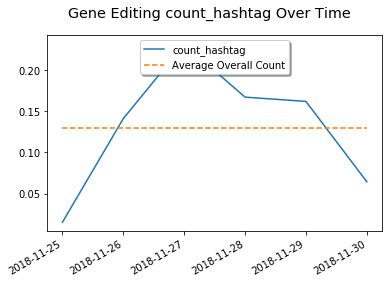

In [73]:
# Using the graph function we made we will plot these averages
HashtagGraphFrame = HashtagStatisticFrame.groupby(["time_stamp"]).mean()

for columns in HashtagGraphFrame[["count_hashtag"]]:
    basic_plot_generator(columns, HashtagGraphFrame.index, HashtagGraphFrame)

In [74]:
# Helper function that calculates what hashtag appear the most
def get_max_word(dataframe):
    
    # Calculates what is most popular
    popular = max(set(dataframe["HASHTAG"]), key=dataframe["HASHTAG"].count)
    
    # Assigns the values
    dataframe["most_popular"] = popular
    
    return dataframe


In [75]:
# Helper function that calculates what the top 10 popular hashtags
def get_top10_word(dataframe):
    
    # sort hashtags from high to low
    top10 = sorted(set(dataframe["HASHTAG"]), key=dataframe["HASHTAG"].count,reverse=True)[:10]
    
    dataframe["top10 hashtags"] = top10
    
    return dataframe
    

In [76]:
# Create a new dataframe with just HASHTAG and count
HashtagPopularFrame = HashtagStatisticFrame[["HASHTAG","count_hashtag"]].copy()

# Unset time_stamp to save
HashtagPopularFrame = HashtagPopularFrame.reset_index()

# Save Frame
save_frame(HashtagPopularFrame, "HashtagPopularFrame")

# Load back the Frame except run it under the covnerter to get a list not object
HashtagPopularFrame = read_frame_convert_list("HashtagPopularFrame", ["HASHTAG"], length = 4)

# Reset index back to date
HashtagPopularFrame = HashtagPopularFrame.set_index("time_stamp")

# Collapsing the dataframe Hashtags and Count
HashtagPopularFrame = HashtagPopularFrame[["HASHTAG","count_hashtag"]].groupby('time_stamp').agg({'HASHTAG': 'sum', 'count_hashtag': 'sum'})

# See what the first 5 results looks like
HashtagPopularFrame[:5]

Begin saving dataframe into a csv.

Finish and saved into HashtagPopularFrame.csv

Reading csv HashtagPopularFrame
Finish reading HashtagPopularFrame



,HASHTAG,count_hashtag
time_stamp,,
2018-11-25,[首例免疫艾滋病基因编辑婴儿],1
2018-11-26,"[基因编辑, 基因编辑婴儿, 中共, 千人计划, 中共, 千人计划, 基因, 基因编辑, 基...",153
2018-11-27,"[基因改造學術峰會, 基因改造, 基因编辑, 禁闻, 中国禁闻, 翻墙新闻, 禁网新闻, 基...",171
2018-11-28,"[INFOAGGREGATOR, ZHIHU, 观点, 基因编辑, 基因人, CENSORE...",112
2018-11-29,"[世界级, 基因, 基因编辑, 基因编辑婴儿, 婴儿, 灾难, 编辑, 美国, 院长, AN...",81


In [77]:
# Now lets save the top most popular word by day into their own column
HashtagPopularFrame = HashtagPopularFrame.apply(lambda x: get_max_word(x), axis = 1)


# Print out the 11 entry
HashtagPopularFrame

,HASHTAG,count_hashtag,most_popular
time_stamp,,,
2018-11-25,[首例免疫艾滋病基因编辑婴儿],1,首例免疫艾滋病基因编辑婴儿
2018-11-26,"[基因编辑, 基因编辑婴儿, 中共, 千人计划, 中共, 千人计划, 基因, 基因编辑, 基...",153,基因编辑
2018-11-27,"[基因改造學術峰會, 基因改造, 基因编辑, 禁闻, 中国禁闻, 翻墙新闻, 禁网新闻, 基...",171,基因编辑
2018-11-28,"[INFOAGGREGATOR, ZHIHU, 观点, 基因编辑, 基因人, CENSORE...",112,贺建奎
2018-11-29,"[世界级, 基因, 基因编辑, 基因编辑婴儿, 婴儿, 灾难, 编辑, 美国, 院长, AN...",81,基因编辑
2018-11-30,"[基因编辑, GENEEDITING, 科学伦理, BIOETHICS, 禁闻, 中国禁闻,...",10,GENEEDITING


In [78]:
# Now lets save the top 10 popular word by day into their own column
HashtagPopularFrame_Top10 = HashtagPopularFrame.apply(lambda x: get_top10_word(x), axis = 1)

HashtagPopularFrame_Top10

,HASHTAG,count_hashtag,most_popular,top10 hashtags
time_stamp,,,,
2018-11-25,[首例免疫艾滋病基因编辑婴儿],1,首例免疫艾滋病基因编辑婴儿,[首例免疫艾滋病基因编辑婴儿]
2018-11-26,"[基因编辑, 基因编辑婴儿, 中共, 千人计划, 中共, 千人计划, 基因, 基因编辑, 基...",153,基因编辑,"[基因编辑, 基因编辑婴儿, 婴儿, 编辑, 基因, 中国, 贺建奎, 中共, CRISPR..."
2018-11-27,"[基因改造學術峰會, 基因改造, 基因编辑, 禁闻, 中国禁闻, 翻墙新闻, 禁网新闻, 基...",171,基因编辑,"[基因编辑, 贺建奎, 基因编辑婴儿, 基因, 艾滋病, 编辑, 禁网新闻, 翻墙新闻, 中..."
2018-11-28,"[INFOAGGREGATOR, ZHIHU, 观点, 基因编辑, 基因人, CENSORE...",112,贺建奎,"[贺建奎, 基因编辑, 禁网新闻, 基因, 编辑, 翻墙新闻, 中国禁闻, 禁闻, 基因编辑..."
2018-11-29,"[世界级, 基因, 基因编辑, 基因编辑婴儿, 婴儿, 灾难, 编辑, 美国, 院长, AN...",81,基因编辑,"[基因编辑, 贺建奎, 基因, 编辑, 基因编辑婴儿, 美国, 灾难, 婴儿, 艾滋病, 中..."
2018-11-30,"[基因编辑, GENEEDITING, 科学伦理, BIOETHICS, 禁闻, 中国禁闻,...",10,GENEEDITING,"[GENEEDITING, 禁闻, 科学伦理, BIOETHICS, CONGRSS, 基因..."


In [79]:
# Let's have a close look at the top 10 hashtags each day
HashtagPopularFrame_Top10['top10 hashtags']

time_stamp
2018-11-25                                      [首例免疫艾滋病基因编辑婴儿]
2018-11-26    [基因编辑, 基因编辑婴儿, 婴儿, 编辑, 基因, 中国, 贺建奎, 中共, CRISPR...
2018-11-27    [基因编辑, 贺建奎, 基因编辑婴儿, 基因, 艾滋病, 编辑, 禁网新闻, 翻墙新闻, 中...
2018-11-28    [贺建奎, 基因编辑, 禁网新闻, 基因, 编辑, 翻墙新闻, 中国禁闻, 禁闻, 基因编辑...
2018-11-29    [基因编辑, 贺建奎, 基因, 编辑, 基因编辑婴儿, 美国, 灾难, 婴儿, 艾滋病, 中...
2018-11-30    [GENEEDITING, 禁闻, 科学伦理, BIOETHICS, CONGRSS, 基因...
Name: top10 hashtags, dtype: object

In [80]:
# Reset Index
HashtagPopularFrame = HashtagPopularFrame.reset_index()

# Save Frame
save_frame(HashtagPopularFrame, "HashtagPopularFrame")

# Load back the Frame except run it under the covnerter to get a list not object
HashtagPopularFrame = read_frame_convert_list("HashtagPopularFrame", ["HASHTAG"], length = 5)

# Set Index
HashtagPopularFrame = HashtagPopularFrame.set_index("time_stamp")

Begin saving dataframe into a csv.

Finish and saved into HashtagPopularFrame.csv

Reading csv HashtagPopularFrame
Finish reading HashtagPopularFrame



In [81]:
# Reset Index
HashtagPopularFrame_Top10 = HashtagPopularFrame_Top10.reset_index()

# Save Frame
save_frame(HashtagPopularFrame_Top10, "HashtagPopularFrame_top10")

# Load back the Frame except run it under the covnerter to get a list not object
HashtagPopularFrame_Top10 = read_frame_convert_list("HashtagPopularFrame_top10", ["HASHTAG"], length = 5)

# Set Index
HashtagPopularFrame_Top10 = HashtagPopularFrame_Top10.set_index("time_stamp")

Begin saving dataframe into a csv.

Finish and saved into HashtagPopularFrame_top10.csv

Reading csv HashtagPopularFrame_top10
Finish reading HashtagPopularFrame_top10



In [82]:
# Counts the occurance of a word
def countOccurance(dateframe, word):
    # Count the amount of hashtag in the list
    count = Counter(dateframe["HASHTAG"])
    title = "count_" + word
    dateframe[title] = count[word]
    return dateframe

In [84]:
# Acquire count of "TIMESUP"
HashtagPopularFrame = HashtagPopularFrame.apply(lambda x: countOccurance(x, "中共"), axis = 1)

# Show the count
HashtagPopularFrame

,HASHTAG,count_hashtag,most_popular,count_TIMESUP,count_中共
time_stamp,,,,,
2018-11-25,[首例免疫艾滋病基因编辑婴儿],1,首例免疫艾滋病基因编辑婴儿,0,0
2018-11-26,"[基因编辑, 基因编辑婴儿, 中共, 千人计划, 中共, 千人计划, 基因, 基因编辑, 基...",153,基因编辑,0,3
2018-11-27,"[基因改造學術峰會, 基因改造, 基因编辑, 禁闻, 中国禁闻, 翻墙新闻, 禁网新闻, 基...",171,基因编辑,0,0
2018-11-28,"[INFOAGGREGATOR, ZHIHU, 观点, 基因编辑, 基因人, CENSORE...",112,贺建奎,0,0
2018-11-29,"[世界级, 基因, 基因编辑, 基因编辑婴儿, 婴儿, 灾难, 编辑, 美国, 院长, AN...",81,基因编辑,0,0
2018-11-30,"[基因编辑, GENEEDITING, 科学伦理, BIOETHICS, 禁闻, 中国禁闻,...",10,GENEEDITING,0,0


# Sentiment Analysis

In [88]:
# import textblob for sentiment analysis

from snownlp import SnowNLP

def sentiment(dataframe):
    
    # 
    SentStatisticFrame = dataframe[['time_stamp','text']].copy()
    SentStatisticFrame["sent"]=''

    
   
    for row in SentStatisticFrame.iterrows():        
        sent = SnowNLP(row[1]['text'])
        #print (sent.sentiment.polarity)
    
        if sent.sentiment > 0.5:
            row[1]['sent']= "pos"

        elif sent.sentiment==0.5:
            row[1]['sent']= "neu"

        else:
            row[1]['sent']= "neg"
            
              
    return SentStatisticFrame

ModuleNotFoundError: No module named 'snownlp'

In [89]:
#count the polarity of tweets on a daily basis

sent_dataframe = sentiment(MasterTweetFrame)
sent_day = sent_dataframe.groupby(['time_stamp','sent']).size().reset_index(name='Size')

sent_day

,time_stamp,sent,Size
0,2018-11-25,neu,65
1,2018-11-26,neg,2
2,2018-11-26,neu,1079
3,2018-11-26,pos,3
4,2018-11-27,neg,1
5,2018-11-27,neu,735
6,2018-11-27,pos,3
7,2018-11-28,neu,665
8,2018-11-28,pos,5
9,2018-11-29,neu,496


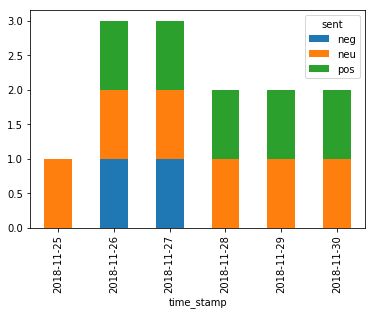

In [90]:
sent_day.groupby(["time_stamp","sent"])["Size"].count().unstack().plot(kind='bar',stacked=True)

# Word Cloud

In [104]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
import numpy as np
from os import path
import os

def word_cloud1(freqs):
    # import an image as a mask to shape the wordcloud
    oval_mask = np.array(Image.open("oval.png"))
    # hyphenated words are acceptable using .generate_from_frequencies(freqs)
    font = '/System/Library/fonts/PingFang.ttc'
    wordcloud = WordCloud(width = 1000,height = 500,font_path=font,background_color='white',mask=oval_mask,stopwords=set()).generate_from_frequencies(freqs)
    
    plt.figure(figsize=(15,8))
    #plt.imshow(wordcloud)
    plt.axis('off')
    #next is to save the plot
    dir_name = 'wordcloud'
    #save the plot as a file named researcher name
    wordcloud.to_file(path.join("WordCloud"+".png"))
    plt.close('all')


In [105]:
def wordfreq(text):
    freq = {}
    for word in text:
        if word in freq.keys():
            freq[word] += 1
        else:
            freq[word] = 1
    return freq

In [109]:
word_cloud1(wordfreq(tokenize_text(MasterTweetFrame)[tokens]))

TypeError: expected string or bytes-like object

In [ ]:
tokenize_text(dataframe)
tokenize_text(dataframe)
MasterTweetFrame['text'].tolist()